# Final Year Project - Fake News Detection (NLP) 

# I. Introduction

## 1. Domain-specific area

This project aims to how using of NLP techniques such as a text classifier for sentiment analysis can help in detecting if a news is real or fake. Fake news, which are misinformation can be presented as legit news, can and will affect people’s opinion and create confusion. Some important information is displayed in widely used news media such as X or twitter. A user can scroll through their phone and will see such news , even if they are real or fake. Under the assumption that most fake news uses similar term or words as real news but attempt to change the views of the users by leading them to a different ideology, the aim of this report is to identify regularities between real or fake names such as the common term or words used. Such examples include conspiracy theory that involves covid-19 that states that 5G towers cause covid-19. Arson were commited on the 5G tower due to rumors by social media. [covid-19 reference](https://www.theguardian.com/uk-news/2020/apr/04/ukphone-masts-attacked-amid-5g-coronavirus-conspiracy-theory). Hence, it is very imporant to correctly detect if a news is real or fake

## 2. Aim and Objectives

The primary aim and objective of this project is to develop a dependable and precise model for detecting fake news, capable of distinguishing between accurate and false information disseminated via social media platforms or news outlets. 

Data cleaning of the dataset along with natual language processing technqiues will be used before training these data into the models.

Finally, a comaprison of the models will be made


## 3. Dataset

In this project, we are working with 2 datasets which were obtained from Kaggle. 

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

<h3> 3.1 Data Quantity</h3><br>
The first dataset, labeled as "True" comprises four distinct columns of data. Similarly, the second dataset, labeled as "Fake" also contains four different columns of data. To construct our fake news detection model, we are working with a combined dataset of 40,000 news articles. This collection is evenly split between real and fake news, with approximately 20,000 articles in each category. Our approach involves merging these two datasets into a unified dataframe.

<h3> 3.2 Data Quality</h3><br>
Preprocessing process such as removing stop words are required to improve accuracy and reliability of our models. The dataset only includes english written news content, hence, our model effectiveness to detect fakes news in other languages will be limited

## 4. Evaluation Methodology

Several widely employed assessment metrics are utilized to evaluate the performance of the fake news detection model. These metrics provide insights into how well the model can accurately classify whether news is genuine or not. The assessment measures to be employed include:

- <b>Accuracy:</b> Accuracy assesses the overall correctness of the fake news predictions. It calculates the ratio of correctly classified news articles to the total number of articles. A higher accuracy score indicates better performance.

- <b>Precision:</b> Precision measures the percentage of accurately predicted fake or genuine news among all the predicted fake or genuine news.

- <b>Recall:</b> Recall is the ratio of accurately predicted fake or genuine news to all the actual fake or genuine news. It focuses on the model's ability to correctly identify all instances of fake or genuine news.

- <b>F1-Score:</b> The F1-score is the balanced average of precision and recall. It provides a metric that balances the trade-off between precision and recall in evaluating the fake news detection model's effectiveness.

These evaluation metrics will be used to gauge how well the fake news detection model is working in this project.

In [1]:
pip install itsdangerous==2.0.1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# II. Implementation

In the process of data analysis and model training, libraries hold significant importance by offering a range of functions and techniques for data manipulation and analysis. These libraries are brought into our Jupyter notebook to execute particular tasks on the data or to facilitate the training and testing of models. Once the datasets are loaded, my initial step involves combining them, followed by an examination that includes analyzing the data's details, its length, and the value counts. This examination will serve as a reference point for future stages.

In [2]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string as st 
import re

import nltk
from nltk import PorterStemmer, WordNetLemmatizer

import seaborn as sns
import itertools
import pickle
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

import gensim

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model

from IPython.display import HTML
from flask import Flask, render_template, request
from flask_cors import CORS

In [3]:
# Read and store files
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [4]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
# Add column 
real_data['target'] = 1
fake_data['target'] = 0 

In [7]:
real_data.tail()

,title,text,subject,date,target
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [8]:
# Merging the 2 datasets
df = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
# Changing 0 to 'FAKE' and 1 to 'REAL'
df['target'] = df['target'].replace({0: 'FAKE', 1: 'REAL'})
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [10]:
# Check how the Lables are Distributed
df['target'].value_counts()

FAKE    23481
REAL    21417
Name: target, dtype: int64

# III. Data Cleaning

 First, I removed all punctuation marks from the text. Next, I performed tokenization by converting the text to lowercase and splitting it into individual tokens. To enhance data quality, I filtered out tokens with a length of less than 2 characters to enhance data quantity. I removed all stop words to further refine the content. I employ lemmatization by transforming the text data into its base form for better analysis.

Finally, I constructed sentences to generate a clean text input suitable for vectorization. All of these operations were executed on the data within the "text" column. The end result was the creation of a new column named "New_text," housing the cleaned data within the dataframe.

In [12]:
# Remove all punctuations
def remove_punctuation(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [13]:
df['New_text']=df['text'].apply(lambda x: remove_punctuation(x))     
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,WASHINGTON Reuters The head of a conservative...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,WASHINGTON Reuters Transgender people will be...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,WASHINGTON Reuters The special counsel invest...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,WASHINGTON Reuters Trump campaign adviser Geo...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,SEATTLEWASHINGTON Reuters President Donald Tr...


In [14]:
# Convert text in lower case, Split() applied for white space
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]

In [15]:
df['New_text'] = df['New_text'].apply(lambda msg:tokenize(msg))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, head, of, a, conser..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, wil..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, special, counsel, i..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."


In [16]:
# Removal of tokens less than length 2
def rem_small_words(text):
    return [x for x in text if len(x)>2]

In [17]:
df['New_text'] = df['New_text'].apply(lambda x: rem_small_words(x))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, head, conservative,..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, wil..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, the, special, counsel, i..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."


In [18]:
# Remove stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

def rem_stopword(text):
    return[word for word in text if word not in stopwords]

In [19]:
df['New_text'] = df['New_text'].apply(lambda x: rem_stopword(x))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."


In [20]:
# Lemmetization
def lemmatizer(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [21]:
df['New_text'] = df['New_text'].apply(lambda x: lemmatizer(x))
df.head(10)

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,"[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,"[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,"[seattlewashington, reuters, president, donald..."
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",REAL,"[west, palm, beach, flawashington, reuters, wh..."
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",REAL,"[west, palm, beach, fla, reuters, president, d..."
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",REAL,"[following, statement, posted, verified, twitt..."
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",REAL,"[following, statement, posted, verified, twitt..."
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",REAL,"[washington, reuters, alabama, secretary, stat..."


In [22]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [23]:
df['New_text'] = df['New_text'].apply(lambda x: return_sentences(x))
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,seattlewashington reuters president donald tru...


In [24]:
df.sample(10)

,title,text,subject,date,target,New_text
2502,U.S. lawmaker wounded in June shooting dischar...,WASHINGTON (Reuters) - U.S. Congressman Steve ...,politicsNews,"July 26, 2017",REAL,washington reuters congressman steve scalise r...
33155,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,"Feb 4, 2017",FAKE,opposing view belief much country heated feud ...
5948,"No U.S. review of treaties, U.N. funding at th...",WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"January 27, 2017",REAL,washington reuters trump administration issue ...
1062,Republican Senator and Trump critic says will ...,WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"October 24, 2017",REAL,washington reuters republican senator jeff fla...
33157,LIBERAL FED JUDGE Who Sided With BLACK LIVES M...,"First, U.S. District Judge Nathaniel M. Gorton...",politics,"Feb 4, 2017",FAKE,first district judge nathaniel gorton boston s...
26039,Campaign In Damage Control Mode After Trump J...,"If there s one rule in politics, it s that you...",News,"September 15, 2016",FAKE,one rule politics never ever ever ever ever ev...
12166,Forgetful ministers keep Mugabe's name alive a...,HARARE (Reuters) - Zimbabwe s Robert Mugabe ma...,worldnews,"December 15, 2017",REAL,harare reuters zimbabwe robert mugabe may depo...
21207,"India PM plans cabinet revamp, some ministers ...",NEW DELHI (Reuters) - Indian Prime Minister Na...,worldnews,"August 31, 2017",REAL,new delhi reuters indian prime minister narend...
12331,Indian Hindu tried to raise money with video o...,NEW DELHI (Reuters) - A Hindu man in India tri...,worldnews,"December 14, 2017",REAL,new delhi reuters hindu man india tried raise ...
26459,Hannity Gets His A** Kicked By Newsweek For L...,Sean Hannity is definitely going to blow a gas...,News,"August 15, 2016",FAKE,sean hannity definitely going blow gasket this...


## Generate Basic WordCloud

Word clouds for both fake and real news texts as part of my textual analysis and data visualization process.These word clouds provide a visual representation of a set of words, with each word's size corresponding to its frequency or importance in the text dataset. This makes it easy to quickly identify the most common terms in the data. The use of larger font sizes for frequently occurring words helps to emphasize the most significant terms in both the fake and real news datasets.

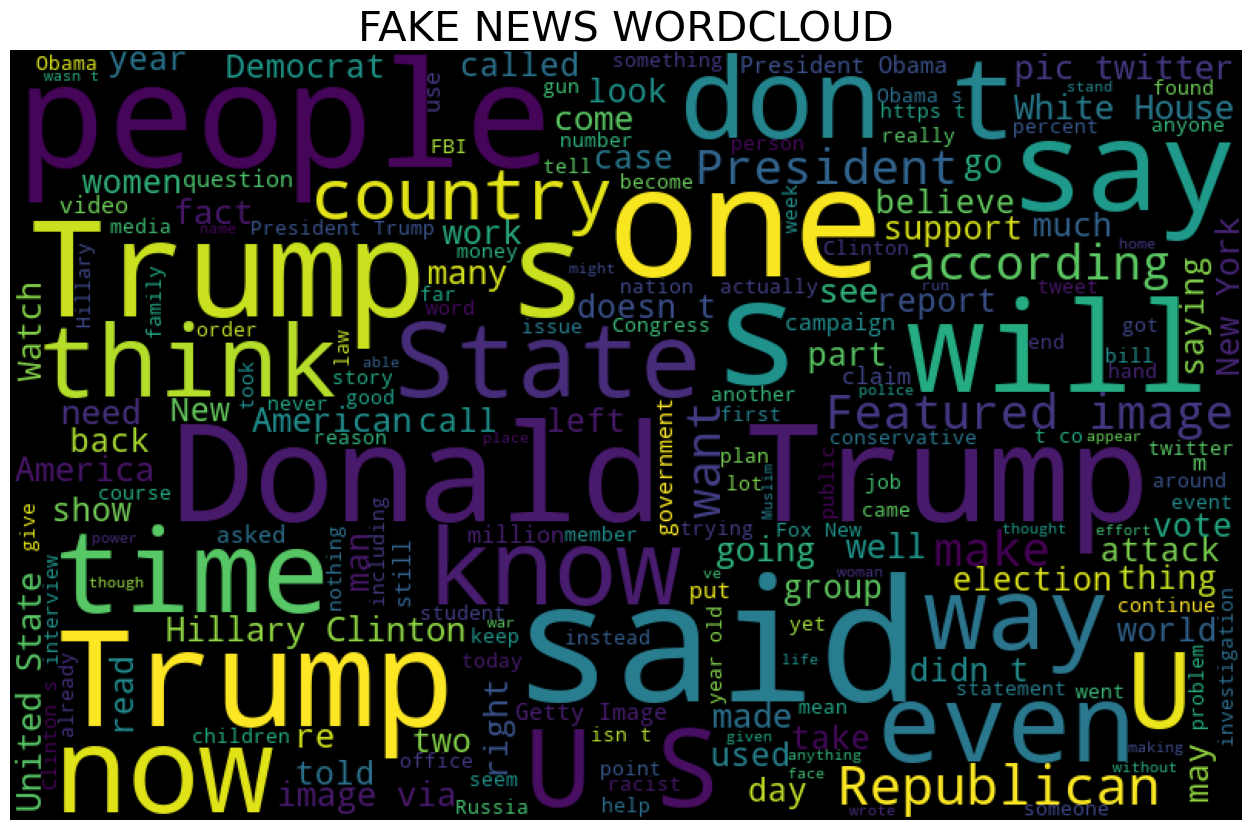

In [25]:
# Create and generate a word cloud image FAKE NEWS
fake_data_wc = df[df["target"] == "FAKE"]
fake_text = ' '.join([text for text in fake_data_wc.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('FAKE NEWS WORDCLOUD',fontsize= 30)
plt.show()

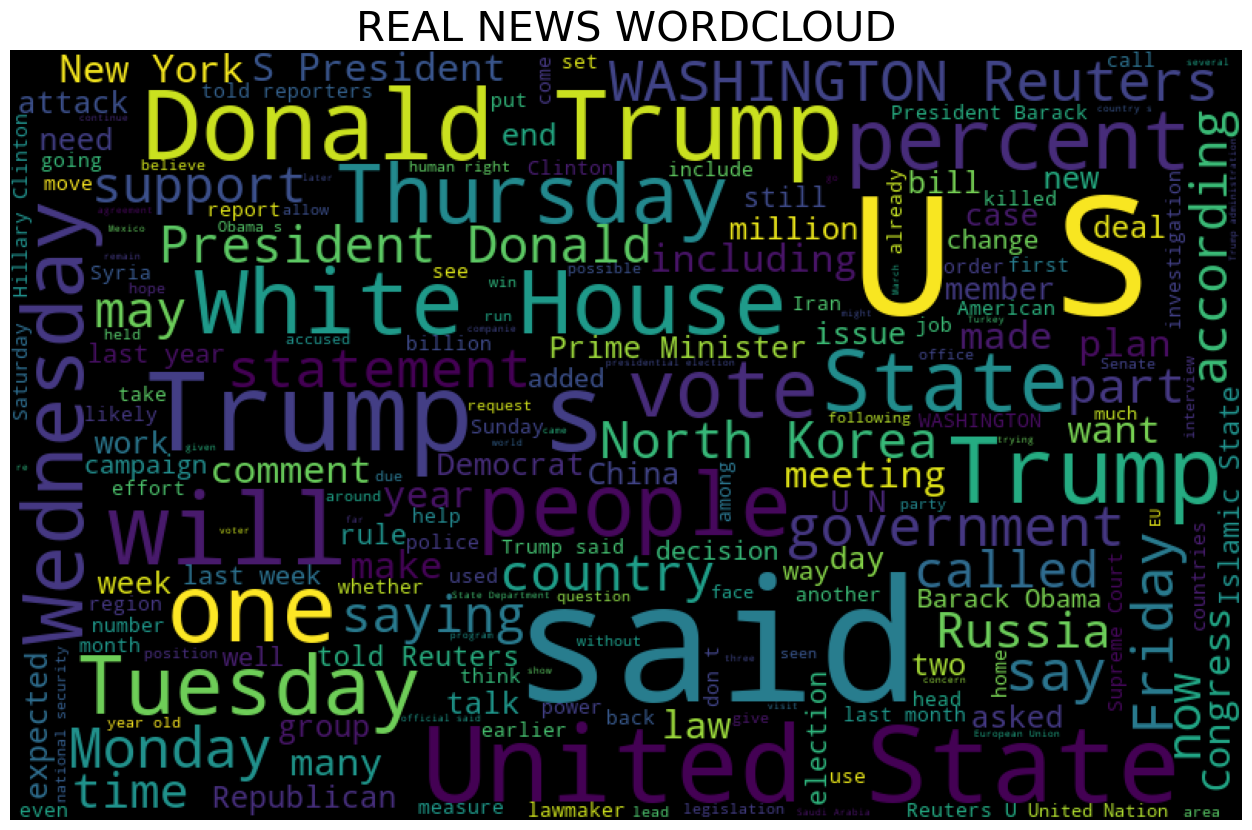

In [26]:
# Create and generate a word cloud image REAL NEWS
real_data_wc = df[df["target"] == "REAL"]
real_text = ' '.join([text for text in real_data_wc.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('REAL NEWS WORDCLOUD',fontsize= 30)
plt.show()

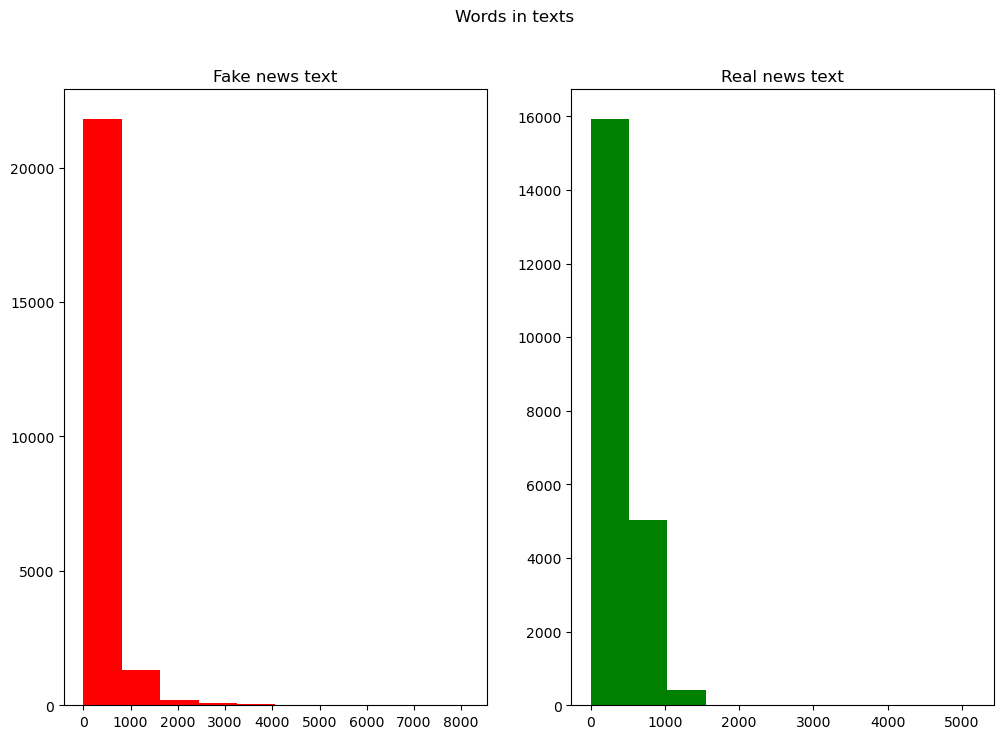

In [27]:
# Number of words in each text
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot histogram for Fake news text length
text_len = df[df['target'] == "FAKE"]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Fake news text')

# Plot histogram for Real news text length
text_len = df[df['target'] == "REAL"]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color='green')
ax2.set_title('Real news text')

fig.suptitle('Words in texts')
plt.show()

target
FAKE    23481
REAL    21417
Name: text, dtype: int64


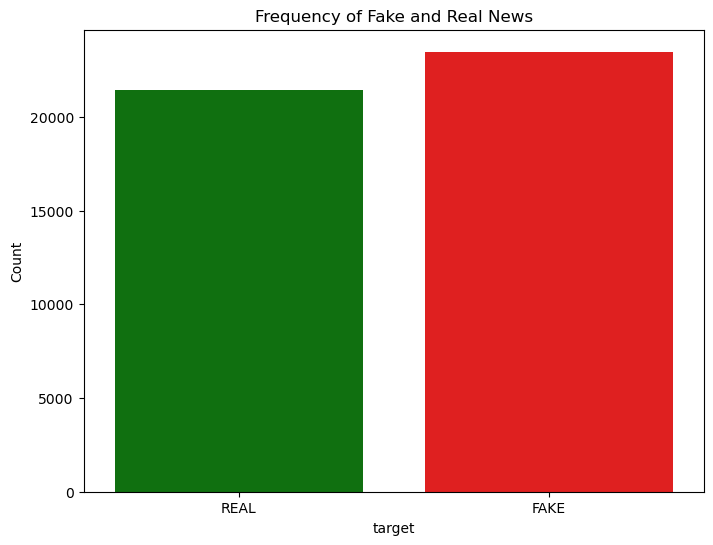

In [28]:
# Comparing the frequency of Fake and Real News
# Print the frequency of Fake and Real News
print(df.groupby(['target'])['text'].count())

# Define your custom colors for the countplot
custom_palette = {'FAKE': 'red', 'REAL': 'green'}

# Create a countplot using Seaborn and Matplotlib with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette=custom_palette)
plt.title('Frequency of Fake and Real News')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

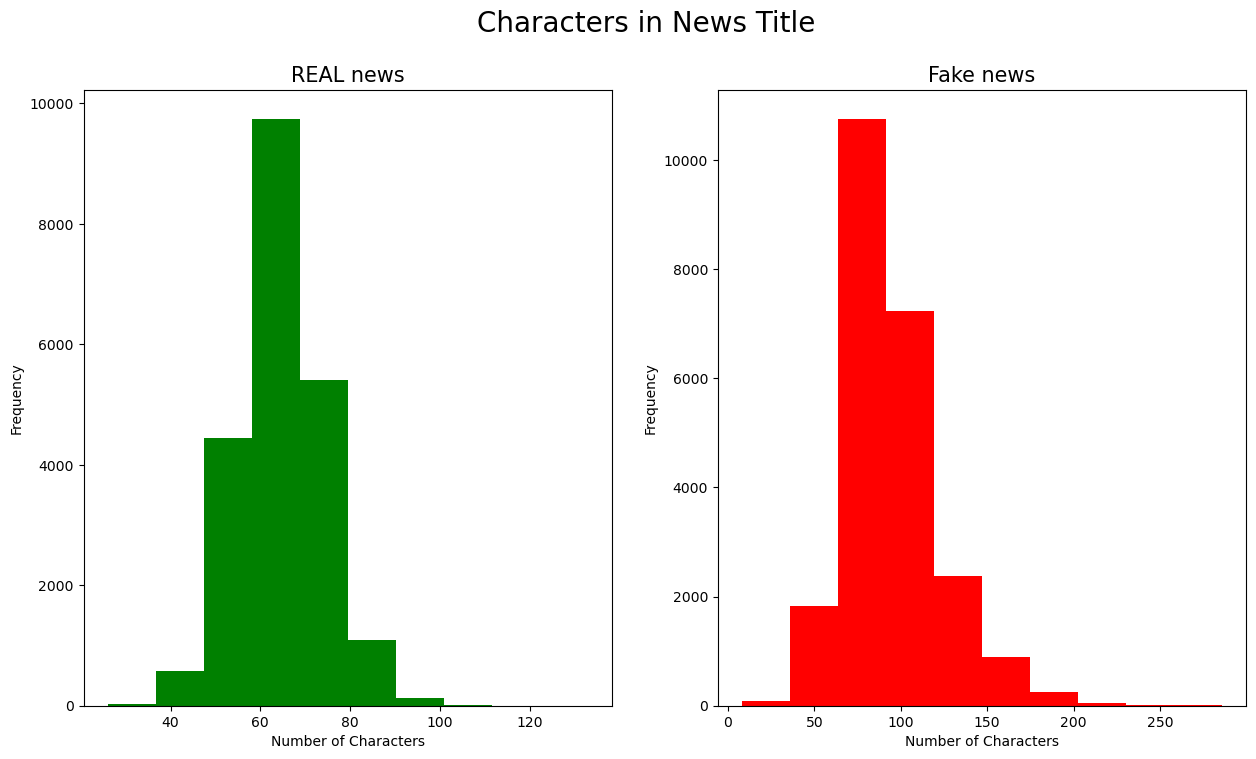

In [29]:
#Comparing the Total numbers of Characters in the Feature Title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Characters in News Title', fontsize=20)

# Histogram for REAL news title lengths
news_len = df[df['target'] == 'REAL']['title'].str.len()
ax1.hist(news_len, color='green', linewidth=2) # , edgecolor='black'
ax1.set_title('REAL news', fontsize=15)

# Histogram for Fake news title lengths
news_len = df[df['target'] == 'FAKE']['title'].str.len()
ax2.hist(news_len, color='red', linewidth=2) # edgecolor='black'
ax2.set_title('Fake news', fontsize=15)

# Adding labels and styling
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')

plt.show()

## Bag of words

In [30]:
# Creating a bag of words with the consecutive frequency for fake text
fake_text_vis =' '.join([str(x) for x in df[df['target']=='FAKE']['New_text']])
a = nltk.FreqDist(fake_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
133461,httpswwwyoutubecomwatchvsmhgkzrwzkg,1
89363,cnbintucson,1
75617,postrnc,1
12036,ngger,38
45488,1972on,3
92451,collette,1
107114,coupling,3
178836,sockpuppet,2
57962,2016again,8
54639,insultsthe,1


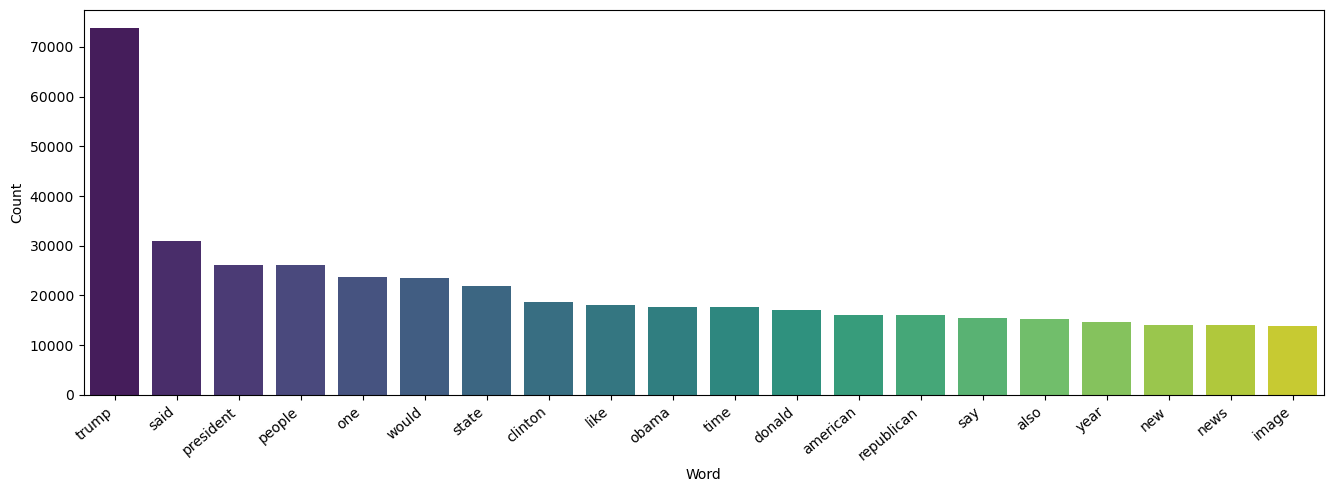

In [31]:
# Selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count", palette="viridis")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [32]:
# Creating a bag of words with the consecutive frequency for Real text
real_text_vis =' '.join([str(x) for x in df[df['target']=='REAL']['New_text']])
a = nltk.FreqDist(real_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
10299,terror”,21
21414,coalcountry,1
92502,allot,1
12118,complicated”,16
26664,televangelist,4
40260,figueres,7
38606,seoulpyongyang,1
86292,heisbourg,1
16189,civilized,18
22342,pummeled,19


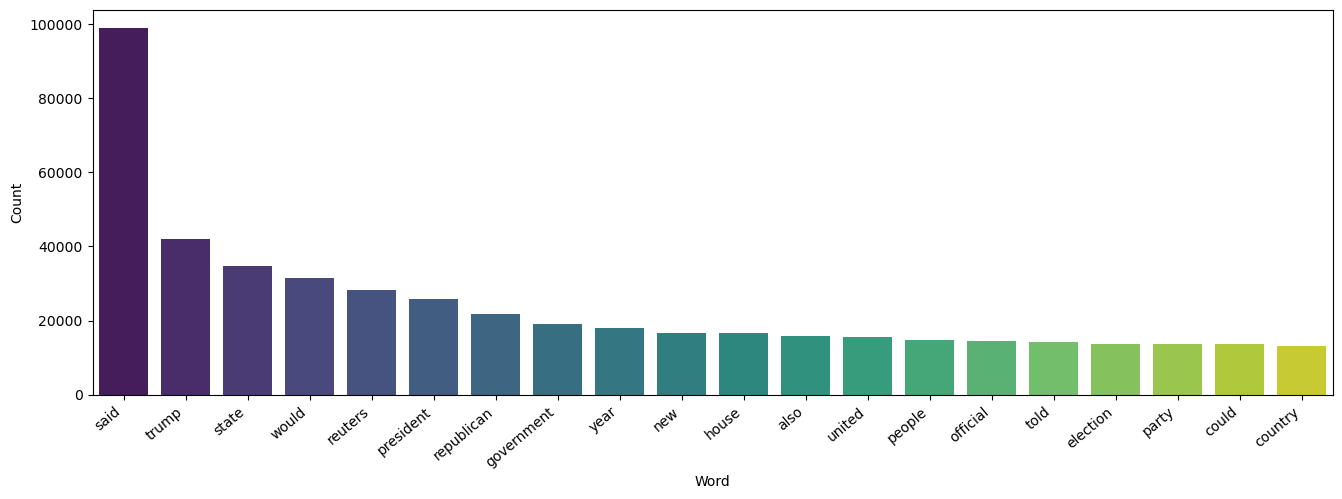

In [33]:
# Selecting top 20 most frequent hashtags 
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count", palette="viridis")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [34]:
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,seattlewashington reuters president donald tru...


In [35]:
df["target"]=df["target"].replace(["FAKE","REAL"],value=[1,0]) 

In [36]:
df.head()

,title,text,subject,date,target,New_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,seattlewashington reuters president donald tru...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   target    44898 non-null  int64 
 5   New_text  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


# IV. Baseline Model

I will be using Random Forest Classifier, Logistic regression model and Decision Tree Classifier. Then I will be comparing all three models to pick the best baseline model out for my project. Firstly I  will test the Random Forest Classifier.


In [38]:
X_train,X_test,y_train,y_test = train_test_split(df['New_text'],df['target'],test_size=0.2, random_state = 10)

In [39]:
# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Convert the text data into numerical features
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Print the shape
print(X_train.shape)
print(X_test.shape)

(35918, 195449)
(8980, 195449)


## 1. Random Forest Classifier

A Random Forest classifier is an ensemble machine learning algorithm that leverages the combined predictions of multiple decision trees to effectively classify online textual news as either genuine or fake. Its primary role in fake news detection is to analyze and categorize the content of news articles circulated online, aiding in the identification of misinformation. This algorithm contributes to understanding the veracity of online news stories.

In [40]:
# Random Forest Classifier (Model 1)
# Train model
random_forest_c_model= RandomForestClassifier()
random_forest_c_model.fit(X_train,y_train)

# Predict
random_forest_c_pred = random_forest_c_model.predict(X_test)

# Compute accuracy and cm
accuracy_rfc = accuracy_score(y_test,random_forest_c_pred)
cm_rfc = confusion_matrix(y_test,random_forest_c_pred)

# Print Accuracy and Confusion matrix
print("Accuracy score : {}".format(accuracy_rfc))
print("Confusion matrix : \n {}".format(cm_rfc))

Accuracy score : 0.9951002227171493
Confusion matrix : 
 [[4257    9]
 [  35 4679]]


In [41]:
# Print the classification report
print(classification_report(y_test, random_forest_c_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4266
           1       1.00      0.99      1.00      4714

    accuracy                           1.00      8980
   macro avg       0.99      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



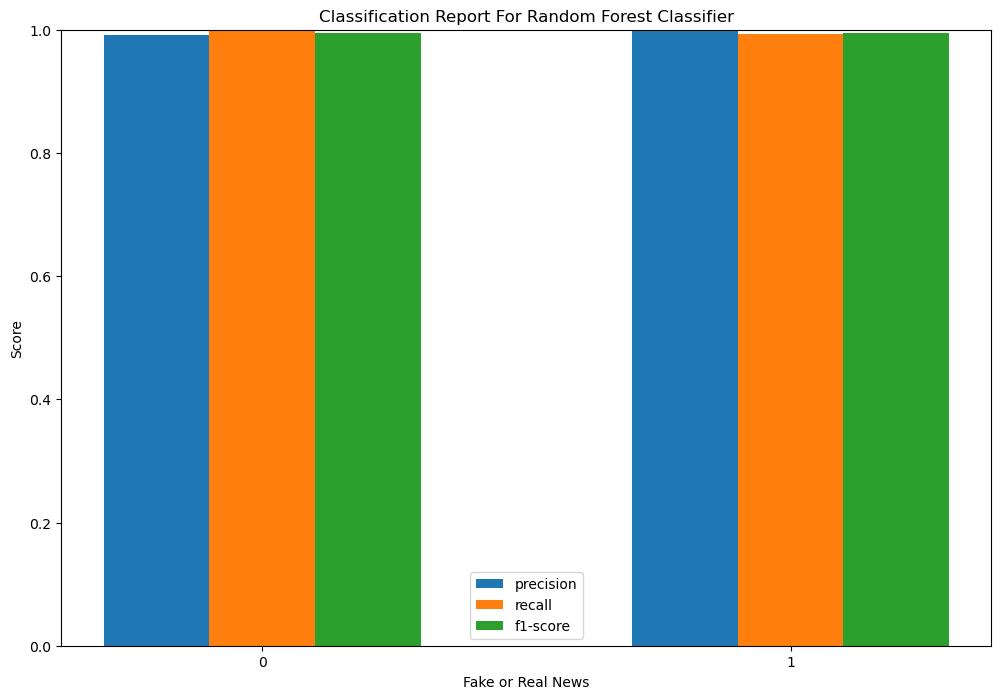

In [42]:
# precision, recall, and f1-score 
report = classification_report(y_test, random_forest_c_pred, output_dict=True)
labels = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]

# Create a bar plot
plt.figure(figsize=(12, 8))
x = np.arange(len(labels))
width = 0.2

for i, metric in enumerate(metrics):
    scores = [report[label][metric] for label in labels]
    plt.bar(x + (i * width), scores, width, label = metric)

# Plot the graph
plt.xticks(x + width, labels)
plt.title("Classification Report For Random Forest Classifier")
plt.xlabel("Fake or Real News")
plt.ylabel("Score")
plt.ylim(0.00, 1.00)
plt.legend()
plt.show()

## 2. Logistic Regression Model

A logistic regression model is a statistical tool employed to forecast binary outcomes by estimating the likelihood of an event taking place. Its primary function within fake news detection is to assess and classify the textual content of online news articles, thereby assisting in the recognition of misinformation otherwise known as fake news.

In [43]:
# Logistic Regression model (Model 2)
#Train model
logistic_regression_model = LogisticRegression(max_iter = 500)
logistic_regression_model.fit(X_train, y_train)

#Predict
logistic_regression_pred = logistic_regression_model.predict(X_test)

# Compute accuracy and cm
accuracy_lrm = accuracy_score(y_test,logistic_regression_pred)
cm_lrm = confusion_matrix(y_test,logistic_regression_pred)

# Print Accuracy and Confusion matrix
print("Accuracy score : {}".format(accuracy_lrm))
print("Confusion matrix : \n {}".format(cm_lrm))

Accuracy score : 0.9904231625835189
Confusion matrix : 
 [[4237   29]
 [  57 4657]]


In [44]:
# Print the classification report
print(classification_report(y_test, logistic_regression_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4266
           1       0.99      0.99      0.99      4714

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



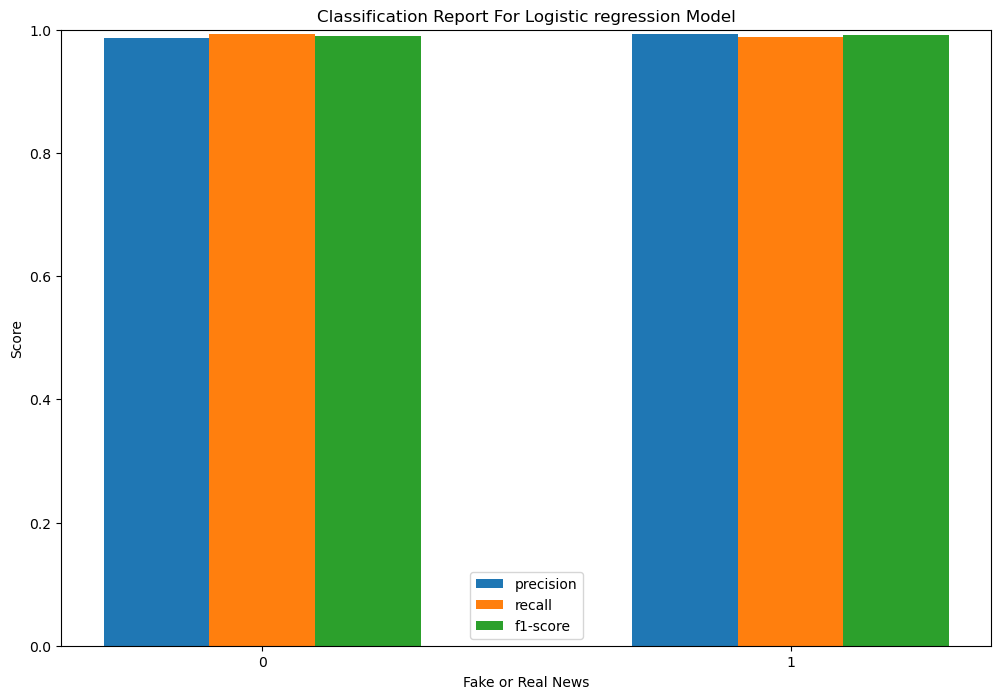

In [45]:
# precision, recall, and f1-score 
report = classification_report(y_test, logistic_regression_pred, output_dict=True)
labels = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]

# Create a bar plot
plt.figure(figsize=(12, 8))
x = np.arange(len(labels))
width = 0.20

for i, metric in enumerate(metrics):
    scores = [report[label][metric] for label in labels]
    plt.bar(x + (i * width), scores, width, label = metric)

# Plot the graph
plt.xticks(x + width, labels)
plt.title("Classification Report For Logistic regression Model")
plt.xlabel("Fake or Real News")
plt.ylabel("Score")
plt.ylim(0.00, 1.00)
plt.legend()
plt.show()

## 3. Decision Tree Classifier

A Decision Tree Classifier is an algorithm in machine learning that constructs a hierarchical, tree-like framework for making predictions or classifying data. Its central purpose in fake news detection involves scrutinizing and categorizing the textual content present in online news articles, thus facilitating the process of flagging instances of misinformation.

In [46]:
#Decision Tree Classifier (Model 3)
# Train a the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

# Prediction
decision_tree_pred  = decision_tree_model.predict(X_test)

# Compute the acc score and cm
accuracy_dtc  = accuracy_score(y_test, decision_tree_pred)
cm_dtc  = confusion_matrix(y_test, decision_tree_pred)

# Print the accuracy score and confusion matrix
print("The accuracy score for the desicion tree is : {}".format(accuracy_dtc))
print("Confusion matrix for the desicion tree is : \n {}".format(cm_dtc))

The accuracy score for the desicion tree is : 0.9984409799554566
Confusion matrix for the desicion tree is : 
 [[4259    7]
 [   7 4707]]


In [47]:
# Print the classification report
print(classification_report(y_test, decision_tree_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4266
           1       1.00      1.00      1.00      4714

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



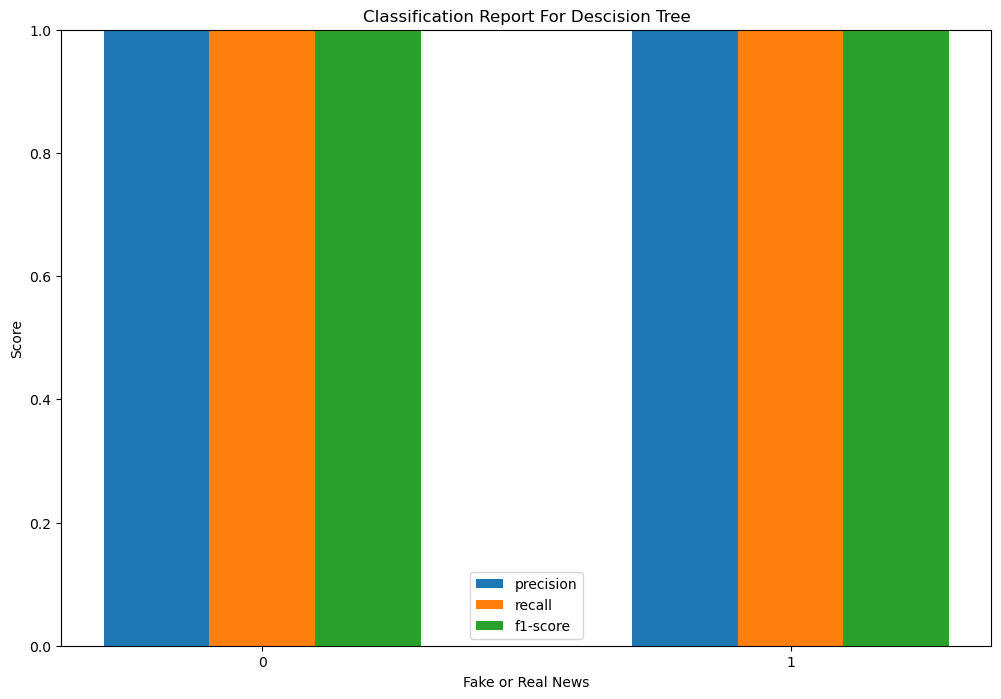

In [48]:
# precision, recall, and f1-score 
report = classification_report(y_test, decision_tree_pred, output_dict=True)
labels = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]

# Create a bar plot 
plt.figure(figsize = (12, 8))
x = np.arange(len(labels))
width = 0.20

for i, metric in enumerate(metrics):
    scores = [report[label][metric] for label in labels]
    plt.bar(x + (i * width), scores, width, label = metric)

# Plot the graph
plt.xticks(x + width, labels)
plt.title("Classification Report For Descision Tree")
plt.xlabel("Fake or Real News")
plt.ylabel("Score")
plt.ylim(0.00, 1.00)
plt.legend()
plt.show()

### Accuracy Comparison

Now we will plot a graph which visually shows us the accuracy comparison of all 3 Models.

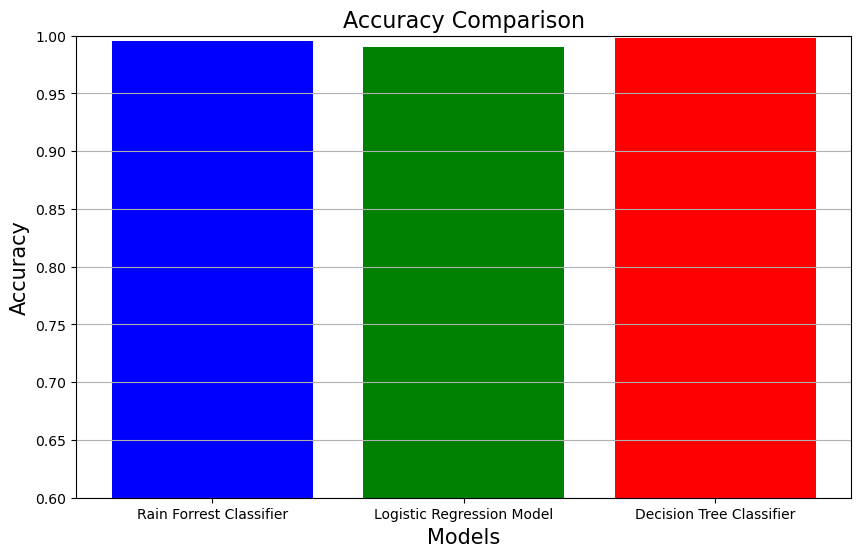

In [49]:
# Create a list of models and their accuracy scores
models = ['Rain Forrest Classifier', 'Logistic Regression Model', 'Decision Tree Classifier']
accuracy_scores = [accuracy_rfc, accuracy_lrm, accuracy_dtc]
colors = ['blue', 'green', 'red']

# Plot the accuracy scores as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=colors)
plt.title('Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0.60, 1.00)
plt.grid(axis='y')
plt.show()

### Comparing Model 1,  Model 2 and Model 3

<p>The Random Forest Classifier achieved an accuracy of 99.23% by correctly classifying 4257 instances as negative and 4654 instances as positive out of a total of 8980 samples. The Logistic Regression Model achieved an accuracy of 99.04% by correctly classifying 4237 instances as negative and 4657 instances as positive out of a total of 8980 samples. However, the Decision Tree Classifier outperformed both the Random Forest Classifier and Logistic Regression Model with an accuracy of 99.80%
    
Despite all three models demonstrating balanced precision, recall, and f1-scores for both classes, the <b>Decision Tree Classifier</b> displayed superior overall performance. Therefore, it can be considered a more dependable option in this particular scenario and the <b>baseline model</b> of this coursework.</p>

# V. Model Train and Test Phase

In [50]:
# Split the DataFrame 'df' into training and testing sets with a 80-20 ratio
df_train, df_test = train_test_split(df, test_size=1-0.8, random_state=42)

# Print the size (number of rows) of the training and testing sets
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 35918
TEST size: 8980


In [51]:
%%time

# Split the text content of each document in the 'df_train' DataFrame into a list of words
documents = [_text.split() for _text in df_train.text] 

Wall time: 1.16 s


## Word2Vec

In [52]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

In [53]:
# Word2Vec model
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [54]:
# Build vocabulary for the Word2Vec model
w2v_model.build_vocab(documents)

In [55]:
# Find vocab size
words = list(w2v_model.wv.index_to_key)
vocab_size = len(words)
print("Vocab size:", vocab_size)

Vocab size: 48853


In [56]:
%%time

# Train the Word2Vec model
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

Wall time: 3min 22s


(356144112, 465262816)

## Tokenization


In [57]:
max_features = 10000
maxlen = 300

In [58]:
%%time

# Create a Tokenizer object and fit it on the text data in 'df_train'
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

# Calculate the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Print the total number of unique words in the vocabulary
print("Total words", vocab_size)

Total words 125499
Wall time: 11.1 s


In [59]:
# KERAS

SEQUENCE_LENGTH = 300


EPOCHS = 30

BATCH_SIZE = 1024

In [60]:
%%time


x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)


x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

Wall time: 10.1 s


## Label Encoder


In [61]:
# Get the unique labels and convert them to a list
labels = df_train.target.unique().tolist()

labels

[1, 0]

In [62]:
# Create a LabelEncoder object
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

# Transform the values into numerical labels
y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

# Reshape the label arrays to ensure compatibility with model training
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Print the shapes of the transformed label arrays
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (35918, 1)
y_test (8980, 1)


In [63]:
# Print values
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (35918, 195449)
y_train (35918, 1)

x_test (8980, 195449)
y_test (8980, 1)


In [64]:
y_train[:10]

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

## Embedding Layer


In [65]:

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))

for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
    
# Print the shape of the resulting embedding matrix
print(embedding_matrix.shape)

(125499, 300)


In [66]:
# Create an Embedding layer
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

## Training LSTM Model

In [67]:
# Building a Sequential neural network model with Embedding, LSTM, Dropout, and Dense layers.
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, dropout=0.25, recurrent_dropout=0.25)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          37649700  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 bidirectional (Bidirection  (None, 200)               320800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 37970701 (144.85 MB)
Trainable params: 321001 (1.22 MB)
Non-trainable params: 37649700 (143.62 MB)
_________________________________________________________________


## Compile Model

In [68]:

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Callback



In [69]:

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

## Train model

In [70]:
%%time
# Fit the model to the training data
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/30


32/32 [==============================] - 213s 7s/step - loss: 0.3840 - accuracy: 0.8328 - val_loss: 0.2161 - val_accuracy: 0.9298 - lr: 0.0010
Epoch 2/30
32/32 [==============================] - 217s 7s/step - loss: 0.1906 - accuracy: 0.9271 - val_loss: 0.2168 - val_accuracy: 0.9379 - lr: 0.0010
Epoch 3/30
32/32 [==============================] - 220s 7s/step - loss: 0.1432 - accuracy: 0.9484 - val_loss: 0.1591 - val_accuracy: 0.9488 - lr: 0.0010
Epoch 4/30
32/32 [==============================] - 219s 7s/step - loss: 0.1247 - accuracy: 0.9562 - val_loss: 0.1409 - val_accuracy: 0.9524 - lr: 0.0010
Epoch 5/30
32/32 [==============================] - 217s 7s/step - loss: 0.1170 - accuracy: 0.9598 - val_loss: 0.1710 - val_accuracy: 0.9385 - lr: 0.0010
Epoch 6/30
32/32 [==============================] - 215s 7s/step - loss: 0.1078 - accuracy: 0.9634 - val_loss: 0.1023 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 7/30
32/32 [==============================] - 215s 7s/step - loss: 0

# VI. Analysis and Testing 

In [71]:
%%time

# Evaluate the model on the test data using the specified batch size
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

# Print values
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9/9 [==============================] - 6s 696ms/step - loss: 0.0366 - accuracy: 0.9866

ACCURACY: 0.9866369962692261
LOSS: 0.03664873167872429
Wall time: 6.42 s


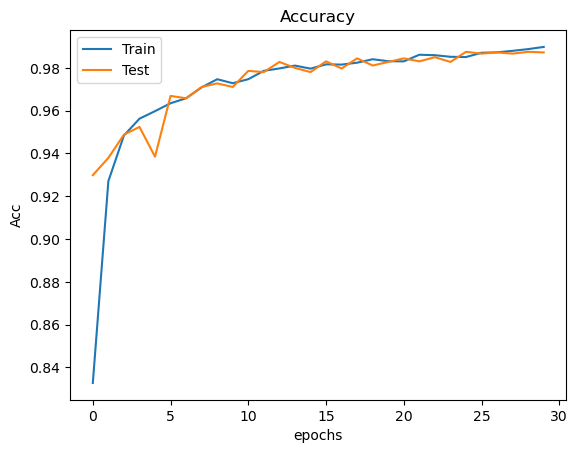

In [72]:
# Create a plot to visualize the training and testing accuracy over epochs
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

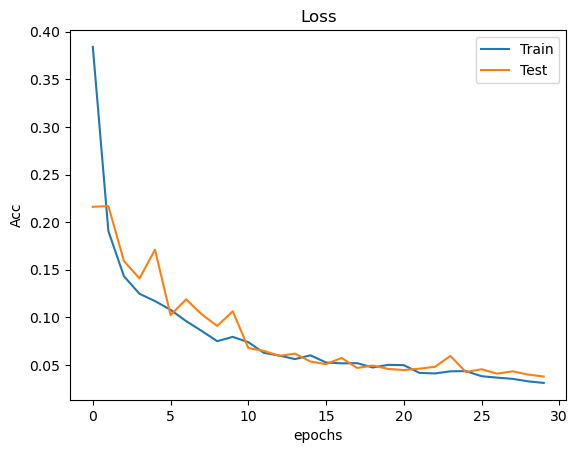

In [73]:
# Create a plot to visualize the training and testing loss over epochs
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [74]:
# Predict probabilities for each class
pred_probabilities = model.predict(x_test)

# Convert probabilities to class predictions using a threshold 
threshold = 0.5
pred = (pred_probabilities > threshold).astype(int)

281/281 [==============================] - 64s 227ms/step


In [75]:
pred_model = model.predict(x_test)

281/281 [==============================] - 61s 218ms/step


## Confusion Matrix


In [76]:
# Print the values
print("Length of y_test:", len(y_test))
print("Length of pred:", len(pred))

Length of y_test: 8980
Length of pred: 8980


In [77]:
# Defining a function for plotting a normalized confusion matrix
def cm_plot(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Remove NaN and 0.00 values from the confusion matrix
    cm = cm[~np.isnan(cm) & (cm != 0.00)]
    # Ensure cm is a square matrix by reshaping it to (n_classes, n_classes)
    n_classes = len(classes)
    cm = cm.reshape((n_classes, n_classes))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real Target', fontsize=25) 
    plt.xlabel('Predicted Target', fontsize=25)

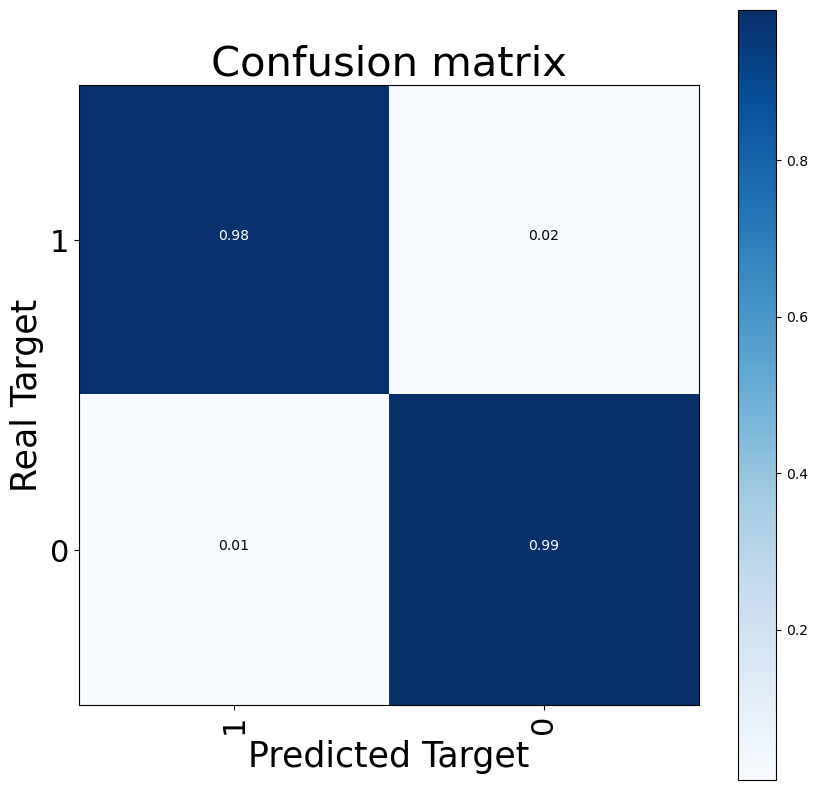

In [78]:
# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)

# Create a figure for the confusion matrix plot
plt.figure(figsize=(10,10))

# Call the custom cm_plot function
cm_plot(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")

# Show the plot
plt.show()

In [79]:
# Save the model
model.save('bilstm_model')

INFO:tensorflow:Assets written to: bilstm_model\assets


INFO:tensorflow:Assets written to: bilstm_model\assets


In [80]:
# Print the classification report
print(classification_report(y_test, pred, target_names=['Fake', 'Real']))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4330
        Real       0.98      0.99      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



My classification report provides the performance metrics for each news class, Fake and Real as well as overall metrics.

<b>Precision:</b>  For Fake, the precision is 0.99, and for Real, it is 0.98.

<b>Recall:</b>  For Fake, the recall is 0.98, and for Real, it is 0.99.

<b>F1-score:</b>  For Fake, the f1-score is 0.99, and for Real, it is 0.99.

<b>Support:</b>  It represents the number of samples in each class.

## Accuracy Score

In [81]:
# Define the class names
target_names = ['Fake', 'Real']

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


## Save the models

In [82]:
# Define filenames for saving the models
# model.save('bilstm_model')
bilstm_MODEL = 'model.keras'
WORD2VEC_MODEL = 'w2v_model.bin'
TOKENIZER_MODEL = 'tokenizer.pkl'
ENCODER_MODEL = 'encoder.pkl'

# Save the trained models
model.save(bilstm_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

In [83]:
# Save dataframe as csv
df.to_csv('real_fake_news.csv', index=False)

## Manual testing

In [84]:
# Placeholder functions for preprocessing steps
def do_fake_news_prediction(text):
    result_text_rem_punc = remove_punctuation(text)
    result_text_tokenize = tokenize(result_text_rem_punc)
    result_text_rem_small_words = rem_small_words(result_text_tokenize)
    result_text_rem_stopword = rem_stopword(result_text_rem_small_words)
    result_text_lemmatizer = lemmatizer(result_text_rem_stopword)
    result_text_return_sentences = return_sentences(result_text_lemmatizer)
    result_text = result_text_return_sentences
    
    # Load Word2Vec model
    w2v_model = gensim.models.Word2Vec.load('w2v_model.bin')
    
    # Tokenize text using the loaded tokenizer
    tokenizer = pickle.load(open('tokenizer.pkl', 'rb'))
    tokenized_text = tokenizer.texts_to_sequences([result_text])
    
    # Pad the tokenized text to a fixed length of 300 (adjust as needed)
    max_sequence_length = 300
    padded_text = pad_sequences(tokenized_text, maxlen=max_sequence_length)
    
    # Load BiLSTM model
    model = load_model('model.keras')
    
    # Predict using BiLSTM model
    predictions = model.predict(padded_text)
    
    return predictions

# Example usage to test 
fake_news_result = do_fake_news_prediction('Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.')
real_news_result = do_fake_news_prediction('WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumpâ€™s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrationâ€™s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. â€œThe Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODâ€™s study and will continue to defend the presidentâ€™s lawful authority in District Court in the meantime,â€ the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: â€œAs mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.â€ Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal â€œgreat news.â€ â€œIâ€™m hoping it means the government has come to see that there is no way to justify a ban and that itâ€™s not good for the military or our country,â€ Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obamaâ€™s policy of accepting them. Trump said on Twitter at the time that the military â€œcannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.â€ Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trumpâ€™s ban while legal challenges to the Republican presidentâ€™s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicantsâ€™ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept â€œsome individuals who are not medically fit for service.â€ The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trumpâ€™s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the presidentâ€™s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity.')
print(real_news_result)


1/1 [==============================] - 1s 544ms/step
[[0.00033718]]


In [85]:
# Define manual_testing function
def manual_testing(news, model):
    
    # Apply preprocessing steps
    result_text = do_fake_news_prediction(news)
    
    print(result_text)
    
    # Display the prediction
    prediction_label = output_label(result_text)
    print("Model Prediction: {}".format(prediction_label))

# Placeholder function for output_label
def output_label(prediction):
    # If prediction >= threshold, return 'Fake News', else return 'Real News'
    if prediction >= 0.5: 
        return 'Fake News'
    else:
        return 'Real News'
                


In [86]:
# Call the manual_testing function
news = input("Enter the news text: ")
manual_testing(news, model)

1/1 [==============================] - 1s 528ms/step
[[0.9999239]]
Model Prediction: Fake News


# VII. Webpage 

Using flask, html and css, a website is made to allow users to key in their news to detect if the news is real or fake via the prediction result

In [87]:
%%writefile templates/index.html


<!DOCTYPE html> 
<html lang="en"> 
  <head> 
    <meta charset="UTF-8" /> 
    <meta name="viewport" content="width=device-width, initial-scale=1.0" /> 
    <link rel="preconnect" href="https://fonts.googleapis.com" /> 
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin /> 
    <link 
      href="https://fonts.googleapis.com/css2?family=Roboto&display=swap" 
      rel="stylesheet" 
    /> 
    <title>Fake News Detection Application</title> 
    <style> 
      html { 
        box-sizing: border-box; 
        font-size: 100%; 
      } 
 
      *, 
      *::before, 
      *::after { 
        margin: 0; 
        padding: 0; 
        box-sizing: inherit; 
      } 
 
      body { 
        margin: 0; 
        padding: 0; 
        font-family: "Roboto", sans-serif; 
        min-height: 100vh; 
        background: radial-gradient(circle, rgb(238, 174, 202) 0%, rgb(148, 187, 233) 100%); 
      } 
 
      section { 
        width: 800px; 
        margin: 8rem auto; 
      } 
 
      section .container { 
        background: radial-gradient(circle, rgb(128, 198, 155) 0%, rgb(148, 187, 233) 100%); 
        color: rgb(17, 14, 14);
        border-radius: 1rem; 
        display: flex; 
        justify-content: center; 
        align-items: center; 
        flex-direction: column; 
        padding: 1rem; 
        gap: 1rem; 
        box-shadow: 0px 0px 5px 0px rgba(0, 0, 0, 0.75);
      } 
 
      section .container .inputfile { 
        width: 0.1px; 
        height: 0.1px; 
        opacity: 0; 
        overflow: hidden; 
        position: absolute; 
        z-index: -1; 
      } 
 
      section .container .inputfile + label { 
        font-size: 1.25em; 
        font-weight: 700; 
        color: white; 
        padding: 1rem 2rem; 
        border-radius: 2rem; 
        background-color: black; 
        display: inline-block; 
        transition: all 200ms ease-in-out; 
      } 
 
      section .container .inputfile:focus + label, 
      section .container .inputfile + label:hover { 
        background-color: red; 
      } 
 
      section .container .inputfile + label { 
        cursor: pointer; 
      } 
 
      section .container button { 
        display: inline-block; 
        font-size: 1em; 
        font-weight: 700; 
        color: black; 
        padding: 1rem 2rem; 
        border-radius: 2rem; 
        cursor: pointer; 
        transition: all 200ms ease-in-out; 
      } 
 
      section .container button:hover { 
        background-color: yellow; 
      } 
 
      section .container textarea { 
        margin: 1.5rem 0; 
        border: none; 
        text-align: center; 
        outline: none; 
      }   
    
      section .container prediction-result {
        font-size: 100px;
        margin-top: 20px;
      }
      
    </style> 
  </head> 
  
    <title>Fake News Detection App</title>
    <script>
    
        function limitWords(textarea, maxWords) {
            const text = textarea.value;
            const words = text.split(/\s+/);
            if (words.length > maxWords) {
                textarea.value = words.slice(0, maxWords).join(" ");
            }
            document.getElementById("word-count").textContent = `Word Count: ${words.length} / ${maxWords}`;
        }
        
        function showPrediction() {
            const predictionLabel = document.getElementById('prediction-result');
            predictionLabel.style.display = 'block'; 
        }
        
        function clearPrediction() {
            const predictTextarea = document.getElementById("predict");
            const predictionResultLabel = document.getElementById("prediction-result");

            // Clear the input textarea
            predictTextarea.value = "";

            // Hide the prediction result label
            predictionResultLabel.style.display = "none";

            // Reset the word count display
            document.getElementById("word-count").textContent = "Word Count: 0 / 1000";
        }

        document.addEventListener("DOMContentLoaded", function() {

            const predictTextarea = document.getElementById("predict");
            const predictButton = document.getElementById("predictbtn");
            const predictionResultLabel = document.getElementById("prediction-result");

            predictButton.addEventListener("click", async () => {
                const predictionText = predictTextarea.value;
                const response = await fetch("http://localhost:5001/predict", {
                    method: "POST",
                    headers: {
                        "Content-Type": "application/json"
                    },
                    body: JSON.stringify({ text: predictionText })
                });

                if (response.ok) {
                    const predictionResult = await response.json();
                    // Update the predict textarea with the prediction result
                    predictionResultLabel.textContent = predictionResult.prediction;

                    // Change label color based on prediction
                    if (predictionResult.prediction === "Fake News") {
                        predictionResultLabel.style.color = "red";
                    } else if (predictionResult.prediction === "Real News") {
                        predictionResultLabel.style.color = "green";
                    } else {
                        // Default color if neither "Fake News" nor "Real News"
                        predictionResultLabel.style.color = "black";
                    }


                } else {
                    console.error("Failed to fetch prediction");
                }
            });




        });
    </script>
  
  <body> 
    <section> 
      <div class="container"> 
        <h1 class="__header">Fake News Detection App</h1> 
        <p class="__para"></p> 
 
        <textarea 
          name="predict" 
          id="predict" 
          cols="80" 
          rows="10" 
          placeholder="input-text" 
          oninput="limitWords(this, 1000)" 
        ></textarea>
        <p id="word-count">Word Count: 0 / 1000</p>
            
        <div class="button-wrap">
          <button id='predictbtn' name='predictbtn' onclick="showPrediction()">Predict</button>
          <button id='clearbtn' name='clearbtn' onclick="clearPrediction()">Clear</button>
        </div>

        <label id='prediction-result' name='prediction-result' style='font-size: 30px; display: none;'>Prediction in progress...</label>

            
      </div> 
    </section> 
  </body> 
</html>


Overwriting templates/index.html


### Displaying the HTML webpage

In [88]:
from IPython.display import HTML

html_content = '<iframe src="index.html" width="900" height="800"></iframe>'

display(HTML(html_content))

c:\Users\shiro\anaconda3\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


: 

## Working Web Application

Run the web application on http://localhost:5001<br>
To submit news text within the web application, users can enter the text directly into the text box.

In [89]:
from flask import Flask, render_template, request
from flask_cors import CORS


# Create a Flask web application instance
app = Flask(__name__)

# Enable CORS for all routes
CORS(app)

# Define routes and their corresponding functions
@app.route('/')
def home(): 
    import os
    # return os.getcwd()
    return render_template('index.html')

@app.route("/html")
def html():
    return render_template('index.html')

@app.route('/hello/<name>')
def hello(name):
    return f"Hello, {name}!"

@app.route('/predict', methods=['POST'])
def predict():
    prediction_text = request.json.get('text', '')
    print(prediction_text)
    prediction = do_fake_news_prediction(prediction_text)
 
    # Assuming the model outputs a probability (0-1)
    if prediction >= 0.5:
        result = 'Fake News'
        print(f"{prediction}")
        print("Fake News")
    else:
        result = 'Real News'
        print(f"{prediction}")
        print("Real News")
        
    return {'prediction': result}

# Run the Flask app
if __name__ == '__main__':
    app.run(host='localhost', port=5001)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://localhost:5001/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:20:00] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:20:01] "GET /favicon.ico HTTP/1.1" 404 -


Singapore steps up mpox precautionary measures; temperature and visual screening at air, sea checkpoints
Thirteen confirmed mpox cases have been detected in Singapore so far this year, all of which are of the less severe Clade 2 infections.
SINGAPORE: Temperature and visual screening will conducted from Friday (Aug 23) for certain inbound travellers and crew at Changi and Seletar airports as a precautionary measure against mpox. 

Such screening will be conducted for those arriving on flights from places which may be exposed to the risk of mpox outbreaks, said the Ministry of Health (MOH) on Thursday night.

So far, there are no direct flights between Singapore and any mpox outbreak country.

Similar screening measures will also be implemented at sea checkpoints for crew and passengers arriving on ships from mpox affected areas.

These precautionary measures will enhance Singapore's "surveillance capabilities" against mpox at its borders, said MOH.

Health advisories have been put in p

1/1 [==============================] - 1s 574ms/step


INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:22:16] "POST /predict HTTP/1.1" 200 -


[[0.00047039]]
Real News
donald trump is dumb


INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:22:43] "GET / HTTP/1.1" 200 -


1/1 [==============================] - 0s 489ms/step


INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:22:46] "POST /predict HTTP/1.1" 200 -


[[0.99983555]]
Fake News
donald trump is dumb
1/1 [==============================] - 0s 473ms/step


INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:22:52] "POST /predict HTTP/1.1" 200 -


[[0.99983555]]
Fake News


INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:23:02] "GET / HTTP/1.1" 200 -


dadweweww
1/1 [==============================] - 1s 506ms/step


INFO:werkzeug:127.0.0.1 - - [23/Aug/2024 00:23:10] "POST /predict HTTP/1.1" 200 -


[[0.9990674]]
Fake News


# VIII. Evaluation

Based on the classification report provided, we have achieved the following report below for my fake news detection model.

<b>Precision:</b>  For Fake, the precision is 0.99, and for Real, it is 0.99.

<b>Recall:</b>  For Fake, the recall is 0.98, and for Real, it is 0.99.

<b>F1-score:</b>  For Fake, the f1-score is 0.99, and for Real, it is 0.99.

<b>Support:</b>  It represents the number of samples in each class.

<b>Overall Accuracy:</b> The overall accuracy of the model is 99%.